# Assignmen 06. Deep Learning for Computer Vision

## GLoria Prada Moore

#### Assigment 6.1

In [22]:
from keras import layers
from keras import models
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
import os, shutil
from keras.datasets import cifar10

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)
                       )) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
#Training the model on MNIST Images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 14s 15ms/step - loss: 0.4130 - accuracy: 0.8673
Epoch 2/5
938/938 [==============================] - 13s 13ms/step - loss: 0.0506 - accuracy: 0.9833
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0332 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0243 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0170 - accuracy: 0.9946


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0237 - accuracy: 0.9929


0.992900013923645

In [12]:
#Save the model
model.save('convn_model_imag.h5')

### Assignment 6.2

In [14]:
import keras


In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [53]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [50]:
train_images.shape
test_images.shape

(10000, 32, 32, 3)

In [54]:

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [55]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 15s 18ms/step - loss: 1.8174 - accuracy: 0.3344 - val_loss: 1.5642 - val_accuracy: 0.4687
Epoch 2/10
782/782 [==============================] - 14s 18ms/step - loss: 1.2244 - accuracy: 0.5696 - val_loss: 1.3714 - val_accuracy: 0.5264
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 1.0062 - accuracy: 0.6477 - val_loss: 1.1674 - val_accuracy: 0.6071
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 0.8612 - accuracy: 0.7007 - val_loss: 0.8996 - val_accuracy: 0.6880
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.7438 - accuracy: 0.7410 - val_loss: 1.0988 - val_accuracy: 0.6577
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.6543 - accuracy: 0.7723 - val_loss: 0.8918 - val_accuracy: 0.7025
Epoch 7/10
782/782 [==============================] - 14s 18ms/step - loss: 0.5782 - accuracy: 0.7993 - val_loss: 1.1463 - val_accuracy:

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 5ms/step - loss: 0.9719 - accuracy: 0.7242


0.7242000102996826

In [5]:
import matplotlib.pyplot as plt

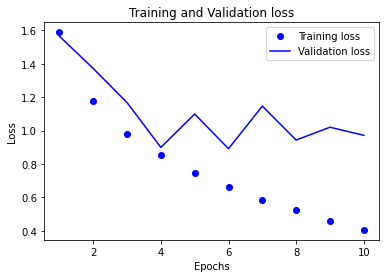

In [58]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

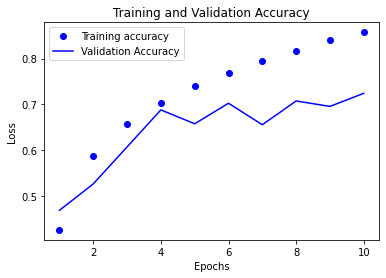

In [59]:
#Plotting the Training and Validation accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Part 6.2

In [61]:
from keras.preprocessing.image import ImageDataGenerator

In [62]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
train_gen = train_datagen.flow(train_images, train_labels, batch_size = 64)


history = model.fit(train_gen, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 34s 43ms/step - loss: 0.8962 - accuracy: 0.6984 - val_loss: 0.9013 - val_accuracy: 0.7074
Epoch 2/10
782/782 [==============================] - 34s 43ms/step - loss: 0.8388 - accuracy: 0.7133 - val_loss: 0.8377 - val_accuracy: 0.7346
Epoch 3/10
782/782 [==============================] - 33s 43ms/step - loss: 0.8230 - accuracy: 0.7213 - val_loss: 0.8187 - val_accuracy: 0.7328
Epoch 4/10
782/782 [==============================] - 34s 43ms/step - loss: 0.8034 - accuracy: 0.7276 - val_loss: 0.7347 - val_accuracy: 0.7524
Epoch 5/10
782/782 [==============================] - 33s 43ms/step - loss: 0.8006 - accuracy: 0.7234 - val_loss: 0.7480 - val_accuracy: 0.7589
Epoch 6/10
782/782 [==============================] - 34s 43ms/step - loss: 0.7793 - accuracy: 0.7385 - val_loss: 0.8707 - val_accuracy: 0.7184
Epoch 7/10
782/782 [==============================] - 33s 43ms/step - loss: 0.7864 - accuracy: 0.7314 - val_loss: 0.9783 - val_accuracy:

In [63]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.8215 - accuracy: 0.7346


0.7346000075340271

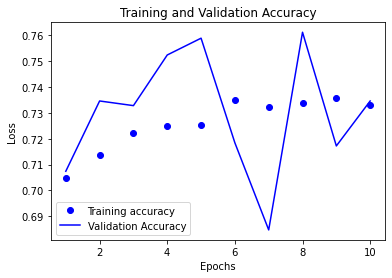

In [65]:
#Plotting the Training and Validation accuracy

history_dict = history.history
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Part 6.3

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'IMG_1252.JPG'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n06359193', 'web_site', 0.40649945), ('n03908714', 'pencil_sharpener', 0.11644238), ('n04442312', 'toaster', 0.028250633)]


In [3]:
c = ['download (1).jpg', 'download (2).jpg', 'download (3).jpg', 'download (4).jpg', 'download (5).jpg', 'IMG_1252.JPG']

In [17]:
list_of_pred = {}
for a in c:
    img_path = a
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
    
    list_of_pred[a]=decode_predictions(preds, top=3)[0]

In [9]:
list_of_pred

{'download (1).jpg': [('n04346328', 'stupa', 0.24427193),
  ('n03028079', 'church', 0.2369774),
  ('n03877845', 'palace', 0.19905813)],
 'download (2).jpg': [('n02124075', 'Egyptian_cat', 0.52904624),
  ('n02123045', 'tabby', 0.3285797),
  ('n02123159', 'tiger_cat', 0.07762549)],
 'download (3).jpg': [('n03388043', 'fountain', 0.76279145),
  ('n02699494', 'altar', 0.08673132),
  ('n02980441', 'castle', 0.051071394)],
 'download (4).jpg': [('n03992509', "potter's_wheel", 0.35131866),
  ('n03930313', 'picket_fence', 0.14287548),
  ('n04136333', 'sarong', 0.040731005)],
 'download (5).jpg': [('n02776631', 'bakery', 0.2775204),
  ('n07932039', 'eggnog', 0.25178096),
  ('n07684084', 'French_loaf', 0.22645608)],
 'IMG_1252.JPG': [('n06359193', 'web_site', 0.40649945),
  ('n03908714', 'pencil_sharpener', 0.11644238),
  ('n04442312', 'toaster', 0.028250633)]}

[('n04346328', 'stupa', 0.24427193), ('n03028079', 'church', 0.2369774), ('n03877845', 'palace', 0.19905813)]


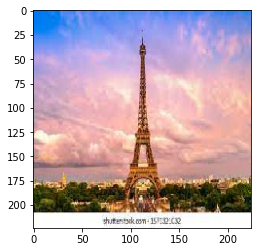

In [36]:
imge = image.load_img('download (1).jpg', target_size = (224, 224))
imge1 = image.load_img('download (2).jpg', target_size = (224, 224))
imge2 = image.load_img('download (3).jpg', target_size = (224, 224))
imge3 = image.load_img('download (4).jpg', target_size = (224, 224))
imge4 = image.load_img('download (5).jpg', target_size = (224, 224))
imge5 = image.load_img('IMG_1252.JPG', target_size = (224, 224))
print(list_of_pred['download (1).jpg'])
plt.imshow(imge)


[('n02124075', 'Egyptian_cat', 0.52904624), ('n02123045', 'tabby', 0.3285797), ('n02123159', 'tiger_cat', 0.07762549)]


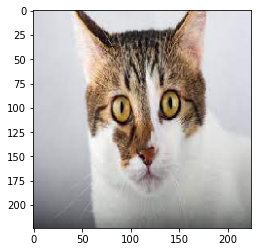

In [37]:
print(list_of_pred['download (2).jpg'])
plt.imshow(imge1)


[('n03388043', 'fountain', 0.76279145), ('n02699494', 'altar', 0.08673132), ('n02980441', 'castle', 0.051071394)]


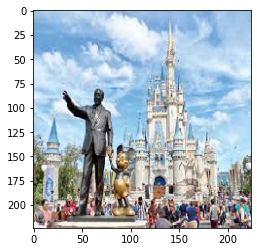

In [38]:
print(list_of_pred['download (3).jpg'])
plt.imshow(imge2)


[('n03992509', "potter's_wheel", 0.35131866), ('n03930313', 'picket_fence', 0.14287548), ('n04136333', 'sarong', 0.040731005)]


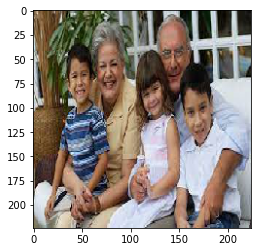

In [39]:
print(list_of_pred['download (4).jpg'])
plt.imshow(imge3)


[('n02776631', 'bakery', 0.2775204), ('n07932039', 'eggnog', 0.25178096), ('n07684084', 'French_loaf', 0.22645608)]


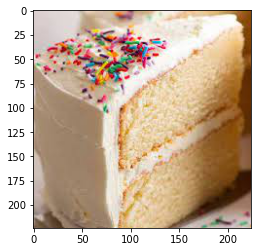

In [40]:
print(list_of_pred['download (5).jpg'])
plt.imshow(imge4)


[('n06359193', 'web_site', 0.40649945), ('n03908714', 'pencil_sharpener', 0.11644238), ('n04442312', 'toaster', 0.028250633)]


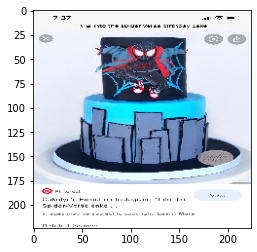

In [41]:
print(list_of_pred['IMG_1252.JPG'])
plt.imshow(imge5)